In [1]:
from carbon import CarbonPair, CarbonOrderUI, CarbonSimulatorUI, analytics as al
from carbon import __version__ as cversion, __date__ as cdate
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
print (f"Carbon Version v{cversion} ({cdate})")
print (f"Analytics Version v{al.__version__} ({al.__date__})")

Carbon Version v2.1 (29/Dec/2022)
Analytics Version v2.0.2 (16/Dec/2022)


# Carbon Simulation - Demo 3-2

In this demo we look at an **order book**

In [2]:
NUM_POINTS = 1000   # number of points on the precise chart

## Setup

In [3]:
ETHUSDC = CarbonPair(tknq="USDC", tknb="ETH")
Sim = CarbonSimulatorUI(pair=ETHUSDC, verbose=False, raiseonerror=True)
CA = al.Analytics(Sim, verbose=True)
CA

Analytics(sim=CarbonSimulatorUI(<0 orders, 0 trades>, pair='ETH/USDC', mm='exact', xf=True))

In [4]:
orders = tuple([
    al.orders_nt("ETH", 100, 2000, 3000),
    al.orders_nt("ETH", 100, 2100, 2550),
    al.orders_nt("ETH", 50, 2300, 2450),
    al.orders_nt("ETH", 75, 2400, 2500),
    al.orders_nt("ETH", 80, 2500, 2700),
    #al.orders_nt("ETH", 100, 2200, 2600),
    al.orders_nt("USDC", 1000*150, 1500, 500),
    al.orders_nt("USDC", 1000*50, 1500, 1300),
    al.orders_nt("USDC", 1000*20, 1450, 1350),
    al.orders_nt("USDC", 1100*150, 1200, 1000),
])

In [5]:
for o in orders:
    Sim.add_order(o.tkn, o.amt, o.p_start, o.p_end)
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,False,2000.0,3000.0,2000.0,USDC per ETH,1
1,1,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,0
2,2,ETHUSDC,ETH,100.0,100.0,ETH,False,2100.0,2550.0,2100.0,USDC per ETH,3
3,3,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,2
4,4,ETHUSDC,ETH,50.0,50.0,ETH,False,2300.0,2450.0,2300.0,USDC per ETH,5
5,5,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,4
6,6,ETHUSDC,ETH,75.0,75.0,ETH,False,2400.0,2500.0,2400.0,USDC per ETH,7
7,7,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,6
8,8,ETHUSDC,ETH,80.0,80.0,ETH,False,2500.0,2700.0,2500.0,USDC per ETH,9
9,9,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,8


In [6]:
Sim.liquidity(Sim.ASDF)

y
pair    tkn           
ETHUSDC ETH      405.0
        USDC  385000.0

In [7]:
prices = al.linspace(400,3000, NUM_POINTS)
prices

0       400.000000
1       402.602603
2       405.205205
3       407.807808
4       410.410410
          ...     
995    2989.589590
996    2992.192192
997    2994.794795
998    2997.397397
999    3000.000000
Length: 1000, dtype: float64

In [8]:
curves_by_pair_bidask = CarbonOrderUI.curves_by_pair_bidask(Sim.state()["orderuis"])
print(list(curves_by_pair_bidask.keys()))

['ETH/USDC']


## Approximate liquidity

In [9]:
liq =  al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False)
liqr = al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=True)

[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:9 bid:9
[calc_liquidity_approx] tkn=ETH
[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:9 bid:9
[calc_liquidity_approx] tkn=USDC


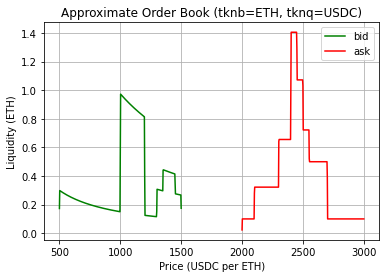

In [10]:
al.plot_approx_orderbook_chart(liq)

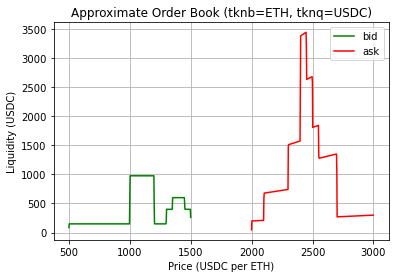

In [11]:
al.plot_approx_orderbook_chart(liqr)

## AMM SELLS base token (ASK side)

In [12]:
# This code calculates the orderbook using the old method, with similates trades, ie 
# using the standard routing algo; this is highly inefficient

# max_liquidity_eth = Sim.liquidity()["ETHUSDC"]["ETH"]
# print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["ETH"]} ETH')
# print("max liquidity", max_liquidity_eth)
# src_amounts_eth = al.linspace0(max_liquidity_eth*1.1, NUM_POINTS)

# CA.simulate_trades(60, CA.ASK)
# CA.simulate_trades(70, CA.ASK)
# trg_amounts = al.vec([
#     CA.simulate_trades(size, CA.ASK) for size in src_amounts_eth
# ])

In [13]:
curves = curves_by_pair_bidask["ETH/USDC"]["ASK"]
c0 = curves[0]
print(f"pair={c0.pair.slashpair} [{c0.pair.price_convention}] tkny={c0.tkny} tknx={c0.tknx}")
dy_p = lambda p: sum(c.dyfromp_f(p) for c in curves)
dx_p = lambda p: sum(c.dxfromdy_f(c.dyfromp_f(p)) for c in curves)
dy_amounts = [dy_p(p) for p in prices]
dx_amounts = [dx_p(p) for p in prices]

pair=ETH/USDC [USDC per ETH] tkny=ETH tknx=USDC


Text(0, 0.5, 'Cumulative amount of y sold [ETH]')

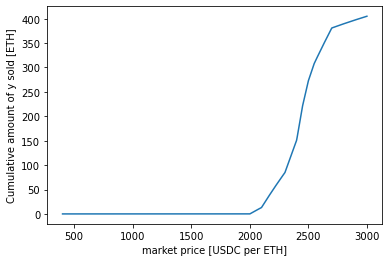

In [14]:
plt.plot(prices, dy_amounts)
plt.xlabel(f"market price [{c0.pair.price_convention}]")
plt.ylabel(f"Cumulative amount of y sold [{c0.tkny}]")

Text(0, 0.5, 'Cumulative amount of x bought [USDC]')

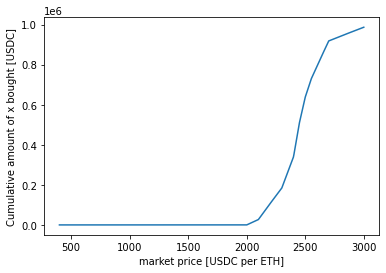

In [15]:
plt.plot(prices, dx_amounts)
plt.xlabel(f"market price [{c0.pair.price_convention}]")
plt.ylabel(f"Cumulative amount of x bought [{c0.tknx}]")

In [16]:
OB = al.OrderBook(dy_amounts, dx_amounts, "ETH", "USDC")
print(OB.explain())

This is the ASK book.
Source token = ETH, target token = USDC.
AMM sells ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


'plotted tokens received against trade size (986,606)'

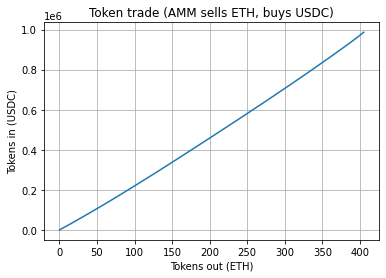

In [17]:
OB.plot_token_amount_chart()

When SELLING ETH, the AMM sells more and more expensively the more ETH it sells

'plotted marginal and effective prices against trade size'

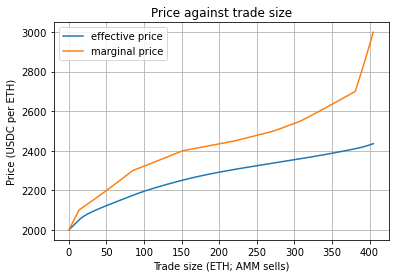

In [18]:
OB.plot_price_chart()

When SELLING ETH, the AMM pays more (in ETH terms) for the first units of USD received than for the later ones

'plotted order book (986,234)'

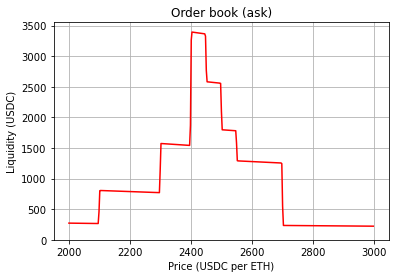

In [19]:
OB.plot_orderbook_chart()

## AMM BUYS base token (BID side)

In [20]:
# max_liquidity_usdc = Sim.liquidity()["ETHUSDC"]["USDC"]
# print(f'sim liquidity {Sim.liquidity()["ETHUSDC"]["USDC"]} USDC')
# print("max liquidity", max_liquidity_usdc)
# src_amounts_eth2 = al.linspace0(max_liquidity_usdc/1000*1.1, NUM_POINTS)
# trg_amounts = al.vec([
#     CA.simulate_trades(size, CA.BID) for size in src_amounts_eth2
# ])

In [21]:
curves = curves_by_pair_bidask["ETH/USDC"]["BID"]
c0 = curves[0]
print(f"pair={c0.pair.slashpair} [{c0.pair.price_convention}] tkny={c0.tkny} tknx={c0.tknx}")
dy_p = lambda p: sum(c.dyfromp_f(p) for c in curves)
dx_p = lambda p: sum(c.dxfromdy_f(c.dyfromp_f(p)) for c in curves)
dy_amounts = [dy_p(p) for p in prices]
dx_amounts = [dx_p(p) for p in prices]

pair=ETH/USDC [USDC per ETH] tkny=USDC tknx=ETH


In [22]:
OB2 = al.OrderBook(dx_amounts, dy_amounts, "ETH", "USDC", bidask=al.OrderBook.BID)
print(OB2.explain())

This is the BID book.
Source token = ETH, target token = USDC.
AMM buys ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


'plotted tokens received against trade size (385,000)'

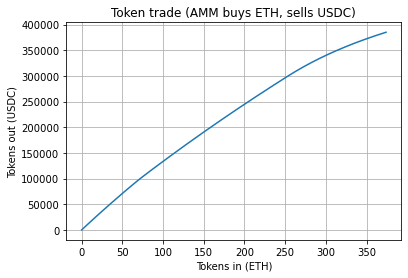

In [23]:
OB2.plot_token_amount_chart()

'plotted marginal and effective prices against trade size'

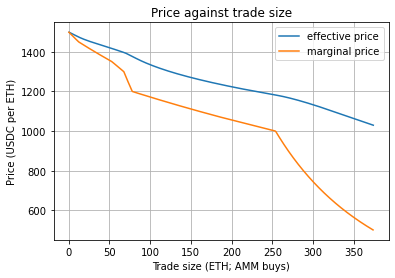

In [24]:
OB2.plot_price_chart()

'plotted order book (-384,540)'

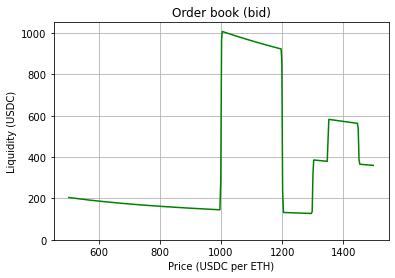

In [25]:
OB2.plot_orderbook_chart()

## Combined

Note: the liquidity is USDC liquidity, not ETH liquidity. This makes the numbers somewhat harder to verify. However -- this means that liquidity can be compared across different pairs that are using the same quote token.

'plotted order book (986,234)'

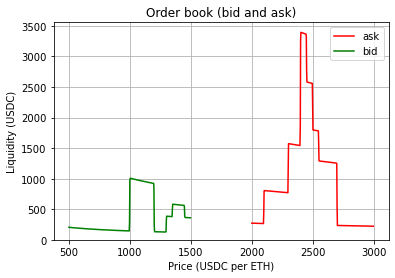

In [26]:
OB.plot_orderbook_chart(otherob=OB2)

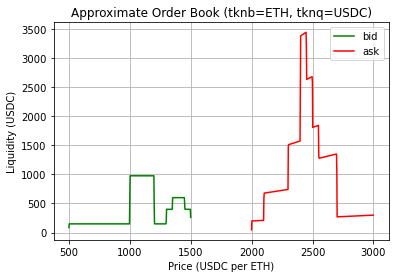

In [27]:
al.plot_approx_orderbook_chart(liqr)

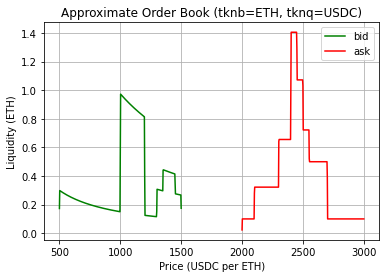

In [28]:
al.plot_approx_orderbook_chart(liq)